# Python for Physical Modeling
## Chapter 5: First Computer Lab

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

### 5.1 HIV Example

Here we explore a model of the viral load -- the number of virons in the blood of a patient infected with HIV -- after the administration of an antiretroviral drug.  One model for the viral load predicts that the concentration $V(t)$ of HIV in the blood at time $t$  after the start of treatment will be


<center>$V(t) = A e^{-\alpha t} + B e^{-\beta t}$</center>  (equation 5.1)


Parameters:

* A and B specify the intial viral load

* $\alpha$ is the rate at which new cells are infected

* $\beta$ is the rate at which virons are removed from the blood






### 5.1.1 Explore the model

In [2]:
# discretize time
time = np.linspace(0, 10, 101)
time

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

Evaluate a compound expression invoking the time stay by using the solution of the viral load model in equation 5.1

set b = 0 and choose some values for alpha beta and A

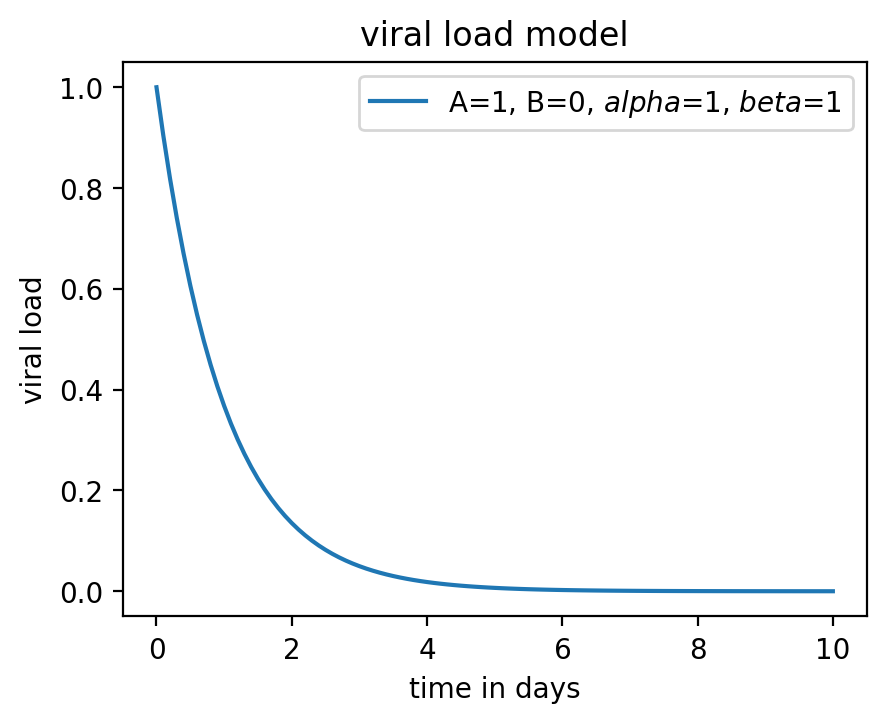

In [3]:
# set parameters
A = 1
B = 0
alpha = 1
beta = 1

# evaluate model
viral_load = A * np.exp(-alpha*time) + B * np.exp(-beta*time)

# plot the evaluations over time
plt.plot(time, viral_load, label=f"A={A}, B={B}, $alpha$={alpha}, $beta$={beta}")
plt.legend()
plt.title('viral load model')
plt.xlabel('time in days')
plt.ylabel('viral load')
plt.show()

create a few more plots using different values of the four model parameters

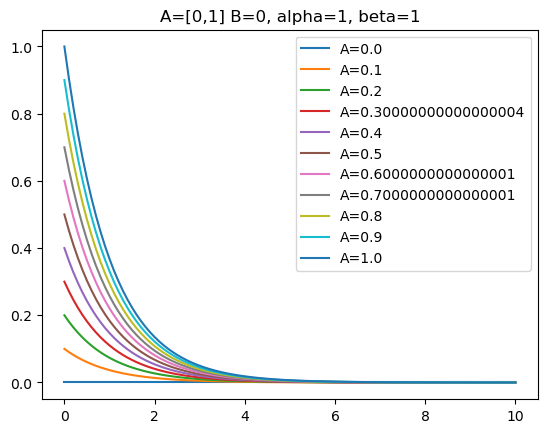

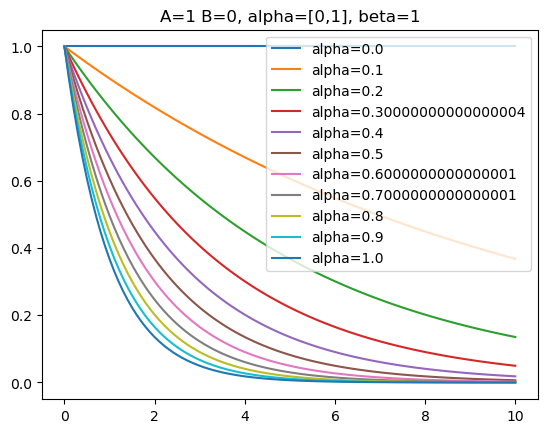

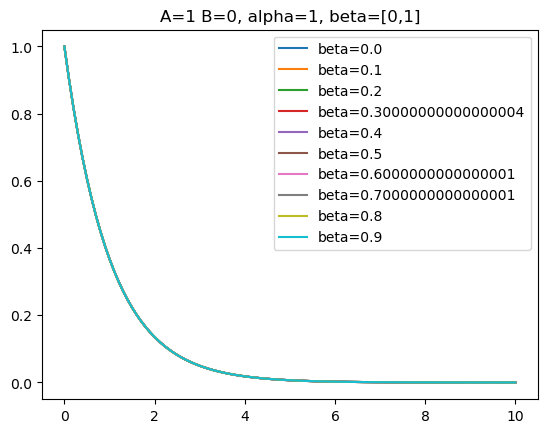

In [5]:
# range A from 0 to 1, B=0, alpha=1, beta=1
A_range = np.arange(0, 1.1, 0.1)
B=0
alpha=1
beta=1

range_vt_evals =  np.array([A_i * np.exp(-alpha*time) + B * np.exp(-beta*time) for A_i in A_range])

range_index = 0
for vt_evals in range_vt_evals:
    plt.plot(time, vt_evals, label=f"A={A_range[range_index]}")
    range_index += 1
plt.title("A=[0,1] B=0, alpha=1, beta=1")
plt.legend()
plt.show()


# range alpha from 0 to 1, A=1, B=0, beta=1
A=1
B=0
alpha_range = np.arange(0, 1.1, 0.1)
beta=1

range_vt_evals =  np.array([A * np.exp(-alpha_i*time) + B * np.exp(-beta*time) for alpha_i in alpha_range])

range_index = 0
for vt_evals in range_vt_evals:
    plt.plot(time, vt_evals, label=f"alpha={alpha_range[range_index]}")
    range_index += 1
plt.title("A=1 B=0, alpha=[0,1], beta=1")
plt.legend()
plt.show()


# range beta from 0 to 1, A=1, B=0, alpha=1   TODO TODO TODO
A=1
B=0
alpha=1
beta_range = np.arange(0, 1, 0.1)

range_vt_evals =  np.array([A * np.exp(-alpha*time) + B * np.exp(-beta_i*time) for beta_i in beta_range])

range_index = 0
for vt_evals in range_vt_evals:
    plt.plot(time, vt_evals, '', label=f"beta={beta_range[range_index]}")
    range_index += 1
plt.title("A=1 B=0, alpha=1, beta=[0,1]")
plt.legend()
plt.show()

# TODO: remove redundancy here

#: TODO: repeat for A=0 and B=[0,1]?

Looking at the graphs above we can see that $\beta$ appears to have no effect on the function between the values of 0 and 1,because B=0.  $\alpha$ appears to affect the curve radius.  A appears to affect the initial viral load amount.  If we set B as other values than 0 beta might have an effect on the graph TODO: evaluate how beta is effecting by removing zero value

### 5.1.2 Experimental Data

obtain the dataset 01HIVseries and plot the data

hiv data read

HIV experimental data
______________________
number of days since start of antiretroviral treatment:
[0.     0.0831 0.1465 0.2587 0.4828 0.7448 0.9817 1.2563 1.4926 1.7299
 1.9915 3.0011 4.0109 5.009  5.9943 7.0028]

number of virons in the blood:
[106100.   93240.  166720.  153780.  118800.  116900.  109570.  111350.
  74388.   83291.   66435.   35408.   21125.   20450.   15798.    4785.2]


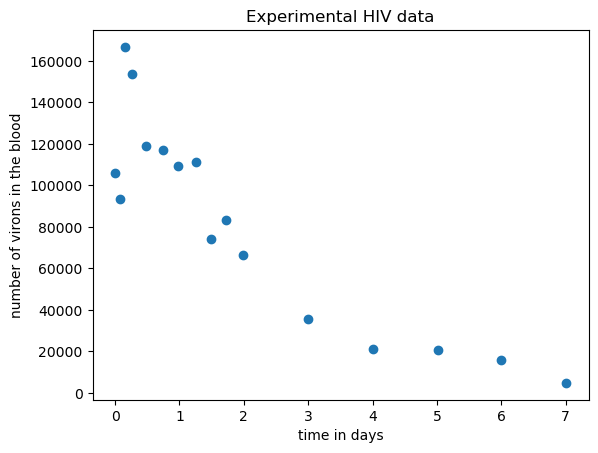

In [6]:
hiv_data_file = "../pmls-data-master/01HIVseries/HIVseries.csv"
hiv_data = np.loadtxt(hiv_data_file, delimiter=',')
hiv_num_days = np.array(hiv_data[:,0])
hiv_num_virons = np.array(hiv_data[:,1])
print('hiv data read\n')

print("HIV experimental data")
print("______________________")
print("number of days since start of antiretroviral treatment:")
print(hiv_num_days)
print()
print("number of virons in the blood:")
print(hiv_num_virons)


plt.plot(hiv_num_days, hiv_num_virons, 'o')
plt.title('Experimental HIV data')
plt.xlabel('time in days')
plt.ylabel('number of virons in the blood')
plt.show()

Assignment: a.  Plot the experimental data points and the function in equation 5.1 on the same axes.  Adjust the four parameters of the model until you can see both the data and the model in your plot

The goal is to now tune the four parameters of Equation 5.1 until the model agrees with the data.  It is hard to find the right needle in a four-dimensional haystack.  We need a more systematic approach than just guessing.  Consider the following:  Assuming $\beta$ > $\alpha$, how does the trial solution behave at long times?

If the data also behave that way can we use the long time-behavior to determine two of the four unkown constants, then hold them fixed while adjusting the other two?

Assignment b:  Carry out this analysis so that you have only one remaining free parameter, which you can adjust farily easily.  Adjust this parameter until you like what you see.

Assignment c:  The latency period of HIV is about ten years, or 3600 days.  Based on your results how does the inverse of the T-cell infection rate $1/\alpha$, compare to the latency period?  Is the latency period long because it takes HIV a  long time to infect new cells? Or does the model suggest another scenario?

TODO: finish all assignment questions for 5.1

# $V(t) = Ae^{-at} + Be^{-bt}$

looking at the data above we can see in the recorded data that 

$V(0) = 106100 $

        & 

$V(7.0028) = 4785.2$

assume $B = 0$

In [4]:
# TODO: move hiv v(t) to a function and define it below the markdown latex cell
# TODO: can i link to wolframalpha solution for alpha
# TODO: read in bacteria data and plot it
# TODO: plot vt and wt bacteria functions
# TODO: add vt and wt functions

# evaluate v(t) using parameters over range [0,10] TODO: is that inclusive or exclusive?
# v_eval1 = hiv_vt(time, A, alpha, B, beta)

# TODO: create different plots of different parameter values as subplots

In [7]:
B = 0
print(f"B= {B}")

B= 0


assume B = 0

assume beta > alpha

at $V(t=0)$ with $B=0$ we get:

$V(0) = Ae^{-a*0} + 0$


at $V(7.0028)$ with $B=0$ we get:

$V(7,0028) = Ae^{-a*7.0028} + 0$ 


we know the value of $V(0)$ and $V(7.0028)$:

$V(0) = A = 106100$


$V(7.0028) = Ae^{-a*7.0028} = 4785.2$

setting the value of A for $V(7.0028)$ we get:

$V(7.0028) = 106100e^{-a*7.0028} = 4785.2$

$e^{-a*7.0028} = \frac{4785.2}{106100}$

solving for alpha we get:

$\alpha = \frac{2500(log(2) + 3log(5) - log(7) + log(1061) - log(1709))}{17507} = 0.442516$


In [8]:
B = 0
A = 106100
beta = 1
alpha = 0.442516

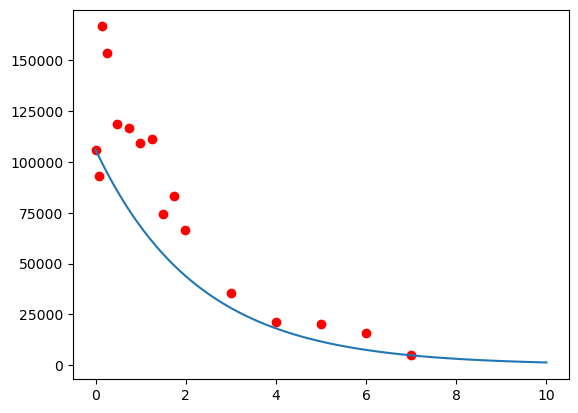

In [9]:

plt.plot(hiv_num_days, hiv_num_virons, 'ro')
t = np.linspace(0, 10, 101)
v_t = A*np.e**(-alpha*t) + B*np.e**(-beta*t)
plt.plot(t, v_t)

alternative parameters where B=0 still and beta > alpha but paramets tuned by adjustments to $10^x$

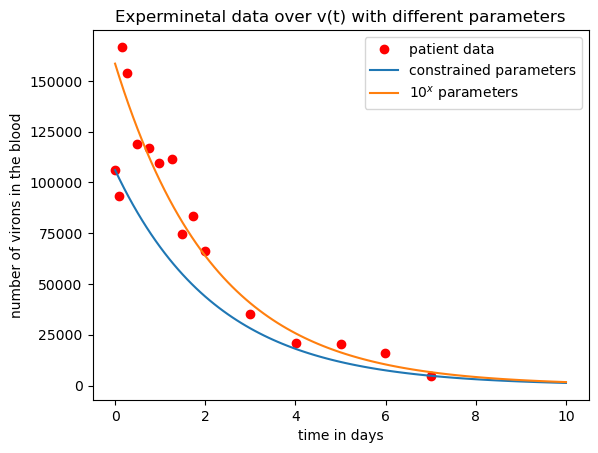

2.2


In [10]:
# original parameters
B = 0
A = 106100
beta = 1
alpha = 0.442516

plt.plot(hiv_num_days, hiv_num_virons, 'ro', label="patient data")
t = np.linspace(0, 10, 101)
v_t = A*np.e**(-alpha*t) + B*np.e**(-beta*t)
plt.plot(t, v_t, label="constrained parameters")

# alternative parameters
A = 10**5.2
B = 0
alpha = 10**1/22
beta = 10**0

v_t = A*np.e**(-alpha*t) + B*np.e**(-beta*t)
plt.plot(t, v_t, label="$10^x$ parameters")

plt.legend()
plt.xlabel("time in days")
plt.ylabel("number of virons in the blood")
plt.title("Experminetal data over v(t) with different parameters")
plt.show()


print(1/alpha)

TODO: add assignments and organize logically in structure of being asked them

HIV

Assignment

a. Plot the experimental data points and the function on the same axes.  Adjust the four parameters of the model until you can see both the data and the model in your plot

b. Carry out this analysis so that you have only one remaining free parameter, which you can adjust fairly easily

c. the latency period of HIV is about ten years, or 3600 days.  based on your results how does the inverse of the t-cell infection ratge, 1/alpha, compare to the latency period?  is the latency period long because it takes HIV a long time to infect new cells? or does the model suggest another scenario?

<hr>

## 5.2 Bacterial Example

TODO: finish all assignment questions for 5.2



TODO: format nicer

Bacteria

a. choose A = 1, r = 1, and plot W(t) for 0 < t < 2

b.  make several arrays w1, w2, w3 and so on using differnet values of r and A, and plot them all on the same axes.

c.  Change the colors and lines styles (solid, dashed, and so on) of the lines

d.  Add a legend to help a reader sort out the curves.  explore some of the other graph options like loglog semilog etc



a.  plot the experimental data points and your trial functions for V(t) on the same axes as you did for W(t) before

when you plot the experimental data, do not join the points by line segments; make each point a symbol such as a small circle or plus sign.  label the axes of your plot select some reasonable values for the parameter r in the model and see if you can get a curve that fits thhe data well.  label the curves, then add a legend to identify which curve is which.  hint to find a good estimate of r make a semilog plot of the quantity 1.0 - data versus time, where data is the array of experimental data points.
can you explain why this is helfpul?  see section 4.3.2 for more details

b.  now try the same thing using the data in gl49novickB.csv.  this time throw away all the data with time value greater than ten hours, and attempt to fit the remainign data to the family of functions W(t) in equation 5.2

hint you can throw away data by slicing an array

at large values of t but smaller than ten hours, botht he data and the function W(t) become straight lines.  find the slope and the y intercept of the straight line determined by equation 5.2 in terms of the two unkown quantities A and r.  next estimate the slope and y intercept of the straight line determed by the data.  from this figure out some good initial guesses for the values of A and r.  then tweak the values to get a nicer looking fit

Read in the bacteria datasets A and B

In [45]:
bacteria_df_a = "../pmls-data-master/15novick/g149novickA.csv"
bacteria_data_a = np.loadtxt(bacteria_df_a, delimiter=',')
bacteria_df_b = "../pmls-data-master/15novick/g149novickB.csv"
bacteria_data_b = np.loadtxt(bacteria_df_b, delimiter=',')

Display the data

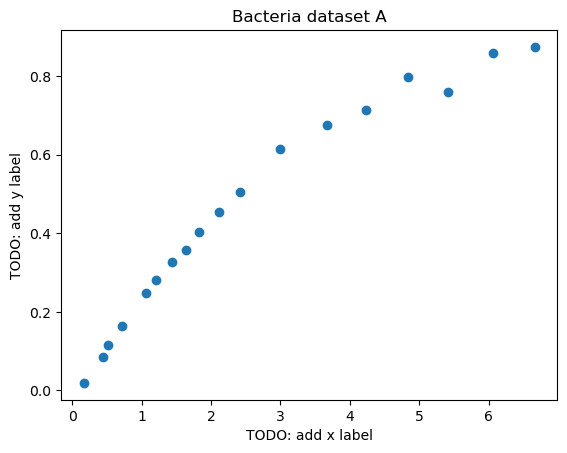

[[0.1699 0.019 ]
 [0.4426 0.0855]
 [0.5111 0.1164]
 [0.7156 0.1639]
 [1.0564 0.247 ]
 [1.2041 0.2803]
 [1.4311 0.3278]
 [1.6465 0.3563]
 [1.8283 0.4038]
 [2.1119 0.4537]
 [2.4182 0.5059]
 [2.997  0.6152]
 [3.6763 0.6746]
 [4.2308 0.7126]
 [4.8316 0.7981]
 [5.407  0.7601]
 [6.0646 0.8599]
 [6.6638 0.8741]]


In [58]:
plt.plot(bacteria_data_a[:,0], bacteria_data_a[:,1], 'o')
plt.title("Bacteria dataset A")
plt.ylabel("TODO: add y label")
plt.xlabel("TODO: add x label")
plt.show()
print(bacteria_data_a)


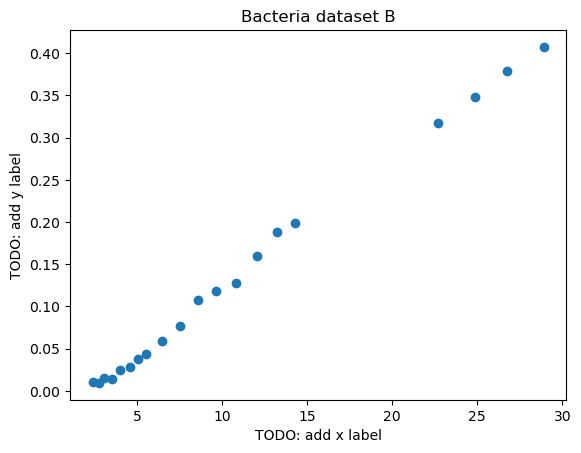

[[2.38320e+00 1.09000e-02]
 [2.72300e+00 9.34290e-03]
 [3.03580e+00 1.46000e-02]
 [3.51770e+00 1.45000e-02]
 [4.00140e+00 2.42000e-02]
 [4.56920e+00 2.86000e-02]
 [5.05280e+00 3.76000e-02]
 [5.53580e+00 4.35000e-02]
 [6.44580e+00 5.92000e-02]
 [7.52620e+00 7.64000e-02]
 [8.58090e+00 1.07100e-01]
 [9.63180e+00 1.18200e-01]
 [1.08242e+01 1.27800e-01]
 [1.20208e+01 1.60000e-01]
 [1.31884e+01 1.88500e-01]
 [1.42958e+01 1.98900e-01]
 [2.27088e+01 3.17300e-01]
 [2.48690e+01 3.48600e-01]
 [2.67739e+01 3.78400e-01]
 [2.89053e+01 4.07500e-01]]


In [59]:
plt.plot(bacteria_data_b[:,0], bacteria_data_b[:,1], 'o')
plt.title("Bacteria dataset B")
plt.ylabel("TODO: add y label")
plt.xlabel("TODO: add x label")
plt.show()
print(bacteria_data_b)



column 1 is time in hours
column 2 is Fraction of maximum beta-galactosidase activity.

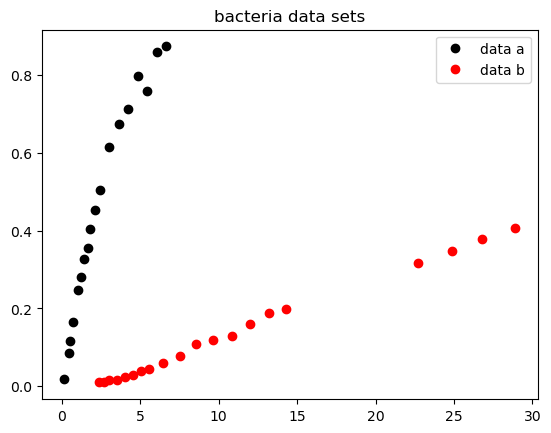

In [14]:
plt.plot(bacteria_data_a[:,0], bacteria_data_a[:,1], 'ko', label='data a')
plt.plot(bacteria_data_b[:,0],bacteria_data_b[:,1], 'ro', label='data b')
plt.title("bacteria data sets")
plt.legend()
plt.show()

In [15]:
# define v(t) and w(t)

def bact_v(t,r):
    return 1 - np.e**(-t/r)

def bact_w(t,r, A):
    return A*(np.e**(-t/r) - 1 + (t/r))

Text(0, 0.5, 'TODO: add y label')

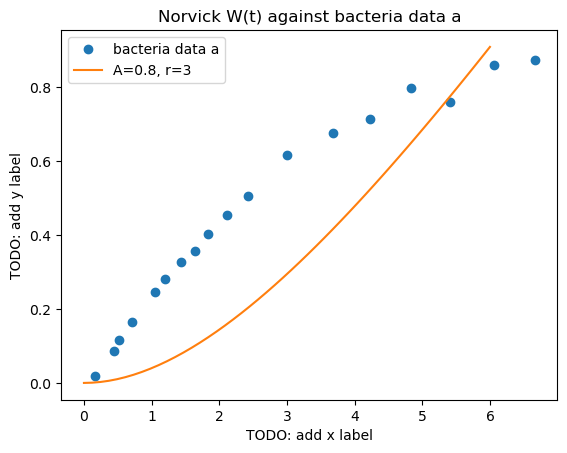

In [44]:
A = 0.8
r = 3
plt.close()
plt.plot(bacteria_data_a[:,0], bacteria_data_a[:,1], 'o', label="bacteria data a")

t = np.linspace(0,6,50)
w_eval = bact_w(t, r, A)
plt.plot(t, w_eval, label=f"A={A}, r={r}")

plt.title("Norvick W(t) against bacteria data a")
plt.legend()
plt.xlabel("TODO: add x label")
plt.ylabel("TODO: add y label")


